# **Exploring Customer Segmentation with K-Means and Agglomerative Clustering**

**Project Description**                         
The project focuses on Customer Segmentation using two clustering techniques: K-Means Clustering and Agglomerative Hierarchical Clustering. These techniques are applied to a dataset consisting of customer demographic and behavioral attributes to identify distinct groups of customers.

**Objective**                
To segment customers into groups based on their annual income and spending scores, enabling businesses to tailor marketing strategies and optimize customer engagement.

**Dataset Details**                           
**Features:**

CustomerID: Unique identifier for each customer (not used in clustering).
Gender: Male or Female (not used directly in clustering).
Age: Age of the customer.
Annual Income (k$): Customer's annual income in thousands of dollars.
Spending Score (1-100): A score indicating customer spending behavior.

**Techniques Applied**

K-Means Clustering

The Elbow Method was used to determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters.
K-Means was run for cluster numbers ranging from 2 to 10, and the "elbow point" was identified to select the optimal clusters.

Agglomerative Hierarchical Clustering

The Dendrogram was plotted to visualize the hierarchical merging of clusters.
The linkage matrix was computed to represent the hierarchical relationships among data points.

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Mall_Customers (1).csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dfa=df['Annual Income (k$)']
iqr=dfa.quantile(0.75)-dfa.quantile(0.25)
iqr
lower=dfa.quantile(0.25)-(1.5*iqr)
upper=dfa.quantile(0.75)+(1.5*iqr)
outlier= df[~((df['Annual Income (k$)']<lower)|(df['Annual Income (k$)']>upper))]
outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


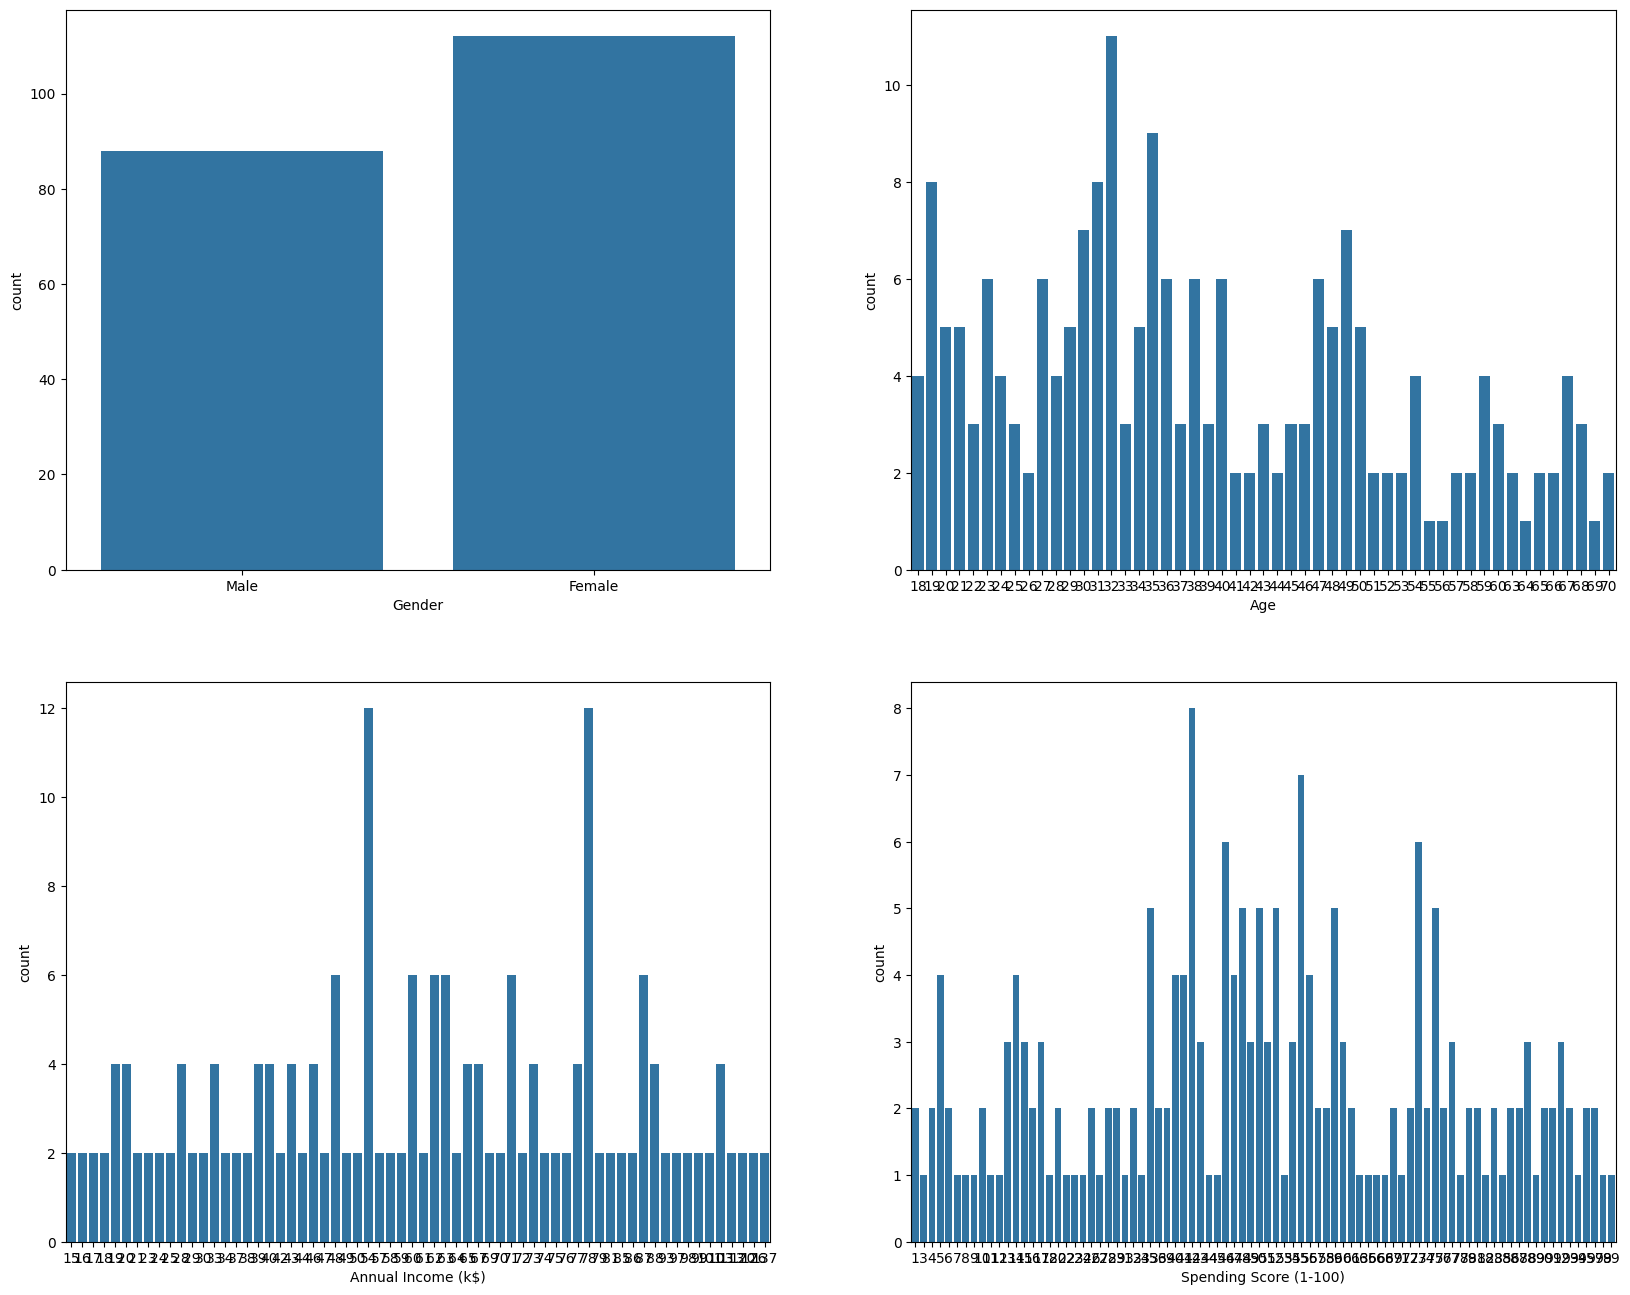

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
x = df.drop("CustomerID", axis=1)
plt.figure(figsize=(20,16))
for i,col in enumerate(x,1):
 plt.subplot(2,2,i)
 sns.countplot(data=df, x=col)
 plt.xlabel(col)
 plt.ylabel("count")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
df1=pd.read_csv("/content/Mall_Customers (1).csv")
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df_a=pd.get_dummies(df1,drop_first=False)
df_a

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


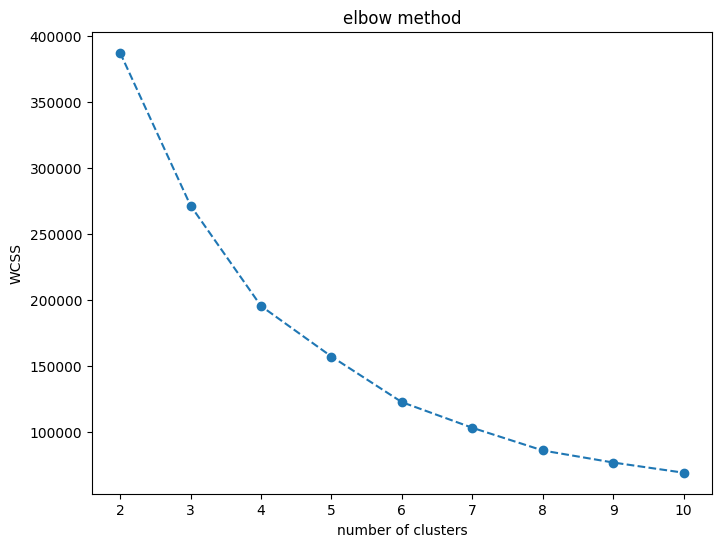

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#scaler=StandardScaler()
#x_scaled=scaler.fit_transform(df_a)

wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(df_a)
  wcss.append(kmeans.inertia_)


plt.figure(figsize=(8,6))
plt.plot(range(2,11),wcss,marker='o',linestyle='--')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering()
model.fit(df_a)
labels=model.labels_
df['cluster']=labels
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(df_a,labels)
print(silhouette_avg)

0.46845529052265106


Text(0.5, 1.0, 'Agglomerative clustering dendogram')

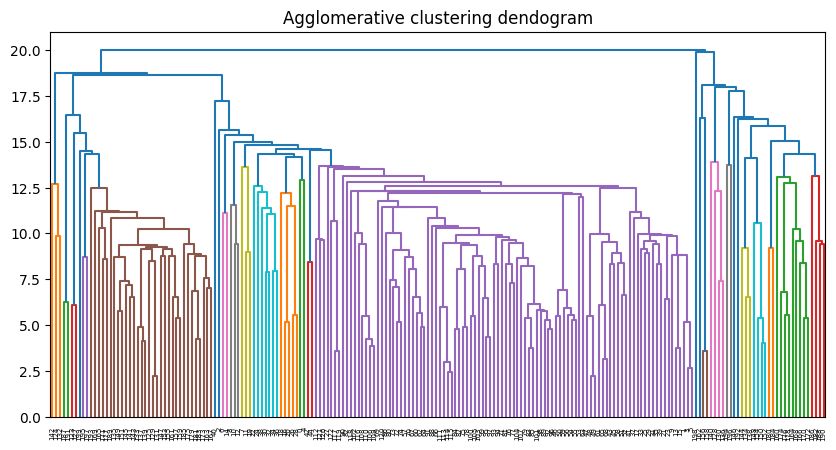

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


z=sch.linkage(df_a)


plt.figure(figsize=(10,5))
den=sch.dendrogram(z)


#plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)


plt.title('Agglomerative clustering dendogram')


**Conclusion**

**K-Means Clustering:**

Identified distinct customer clusters based on their annual income and spending patterns.
The Elbow Method provided a clear visualization for selecting the optimal number of clusters.

**Agglomerative Clustering:**

Provided hierarchical relationships among customer groups, giving insights into cluster similarity and allowing further exploration of merging criteria.